In [43]:
import numpy as np
def parse_input(iname:str):
    with open(iname, 'r') as f:
        lines = f.readlines()

    nb_lines = len(lines)
    nb_cols = len(lines[0]) - 1 #-1 because of \n
    rocks = set()
    for i, line in enumerate(lines):
        rocks.update([i+k*1j for k, char in enumerate(line) if char == '#'])
        if line.find('S') != -1:
            start_pos = i + line.find('S')*1j
    return nb_lines, nb_cols, rocks, start_pos


def update_positions(nb_lines:int,nb_cols:int, rocks:set[complex], positions:set[complex], check_bounds=True):
    new_pos = set()
    for pos in positions:
        for direction in (1, -1, 1j, -1j):
            test_pos = pos + direction
            if check_bounds and (test_pos.real < 0 or test_pos.real >= nb_lines or test_pos.imag < 0 or test_pos.imag >= nb_cols):
                continue #Outside the canvas bounds
            if test_pos in rocks:
                continue #Forbidden position
            new_pos.add(test_pos)
    return new_pos



def prob1():
    print("##########First part of the problem##########")
    nb_lines, nb_cols, rocks, start_pos = parse_input('input.1')
    current_positions = set()
    current_positions.add(start_pos)

    for i in range(64):
        current_positions = update_positions(nb_lines, nb_cols, rocks, current_positions)
    print(f"Number or reachable plots: {len(current_positions)}")



def prob2():
    print("##########Second part of the problem##########")
    nb_lines, nb_cols, rocks, start_pos = parse_input('input.1')
    current_positions = set()
    current_positions.add(start_pos)
    all_rocks = set()
    for rock in rocks:
        for i in range(-20, 20):
            for j in range(-20, 20):
                all_rocks.add(rock + i*nb_lines +j*nb_cols*1j)
    
    print(nb_lines, nb_cols)
    #Considering start_pos at (0,0), all the possible points (without rocks) for step n are -> (i, j) st |i+j| <= n and (i+j) ≡ n [2] which equals (n+1)^2

    length_list = []

    for i in range(200):
        current_positions = update_positions(nb_lines*1000000, nb_cols*10000000, all_rocks, current_positions, False)
        length_list.append(len(current_positions))

    return length_list

prob1()
length_list = prob2()


##########First part of the problem##########
Number or reachable plots: 3605
##########Second part of the problem##########
131 131


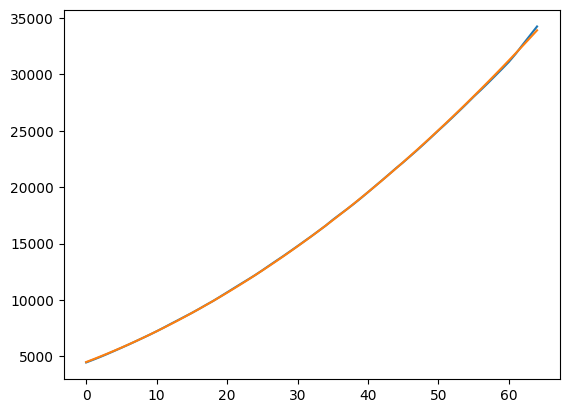

In [44]:
import matplotlib.pyplot as plt
import numpy as np
length_list = np.array(length_list)
# plt.plot((length_list[2:] - length_list[:-2] - 4*np.arange(2, 200))%11)
selected = length_list[70::2]
x = np.arange(72, 202, 2)
a, b, c = np.polyfit(x, selected, 2)
y = a*x*x + b*x + c
plt.plot(selected)
plt.plot(y)


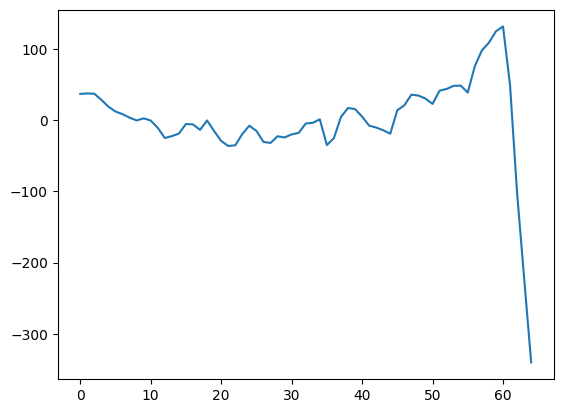

In [45]:
plt.plot(y - selected)